# Case Study

### Nahrání souboru

In [1]:
from google.colab import files
uploaded = files.upload()

Saving case_study.csv to case_study.csv


### Zobrazení souborů

In [2]:
import os
import shutil

uploaded_files = os.listdir()
print(uploaded_files)

['.config', 'case_study.csv', 'sample_data']


### (dle potřeby) Smazání souborů

In [ ]:
uploaded_files = os.listdir()

excluded_dirs = ['.config']

for file in uploaded_files:
    if file not in excluded_dirs:
        if os.path.isfile(file):
            os.remove(file)
        elif os.path.isdir(file):
            shutil.rmtree(file)

### Zobrazení prvních řádků k náhledu

In [3]:
import pandas as pd

df = pd.read_csv('case_study.csv')

print(df.head())

     Order ID E-shop             Shipping Method    Status Customer Group  \
0  1700289480     PL      inpost_pickup_delivery  complete        General   
1  2500087517     UA           novaposhta_parcel  complete  NOT LOGGED IN   
2   203053482     CZ  zasilkovna_shipping_pickup  complete        General   
3   402018740     RO       urgentcargus_delivery  complete  NOT LOGGED IN   
4   104060003     SK       gls_delivery_delivery  complete  NOT LOGGED IN   

   Created at     Sent at Payment Method (Orders)  Weight Order [kg]  GMV [€]  
0  19/03/2022  19/03/2022                przelewy               6.11  28.3643  
1  23/01/2022  24/01/2022          cashondelivery               0.82  58.9656  
2  24/01/2022  24/01/2022                gpwebpay               2.98  52.8768  
3  21/02/2022  21/02/2022          cashondelivery               1.59  17.7332  
4  01/01/2022  01/01/2022          cashondelivery               1.13  24.8500  


Vizuální výstup

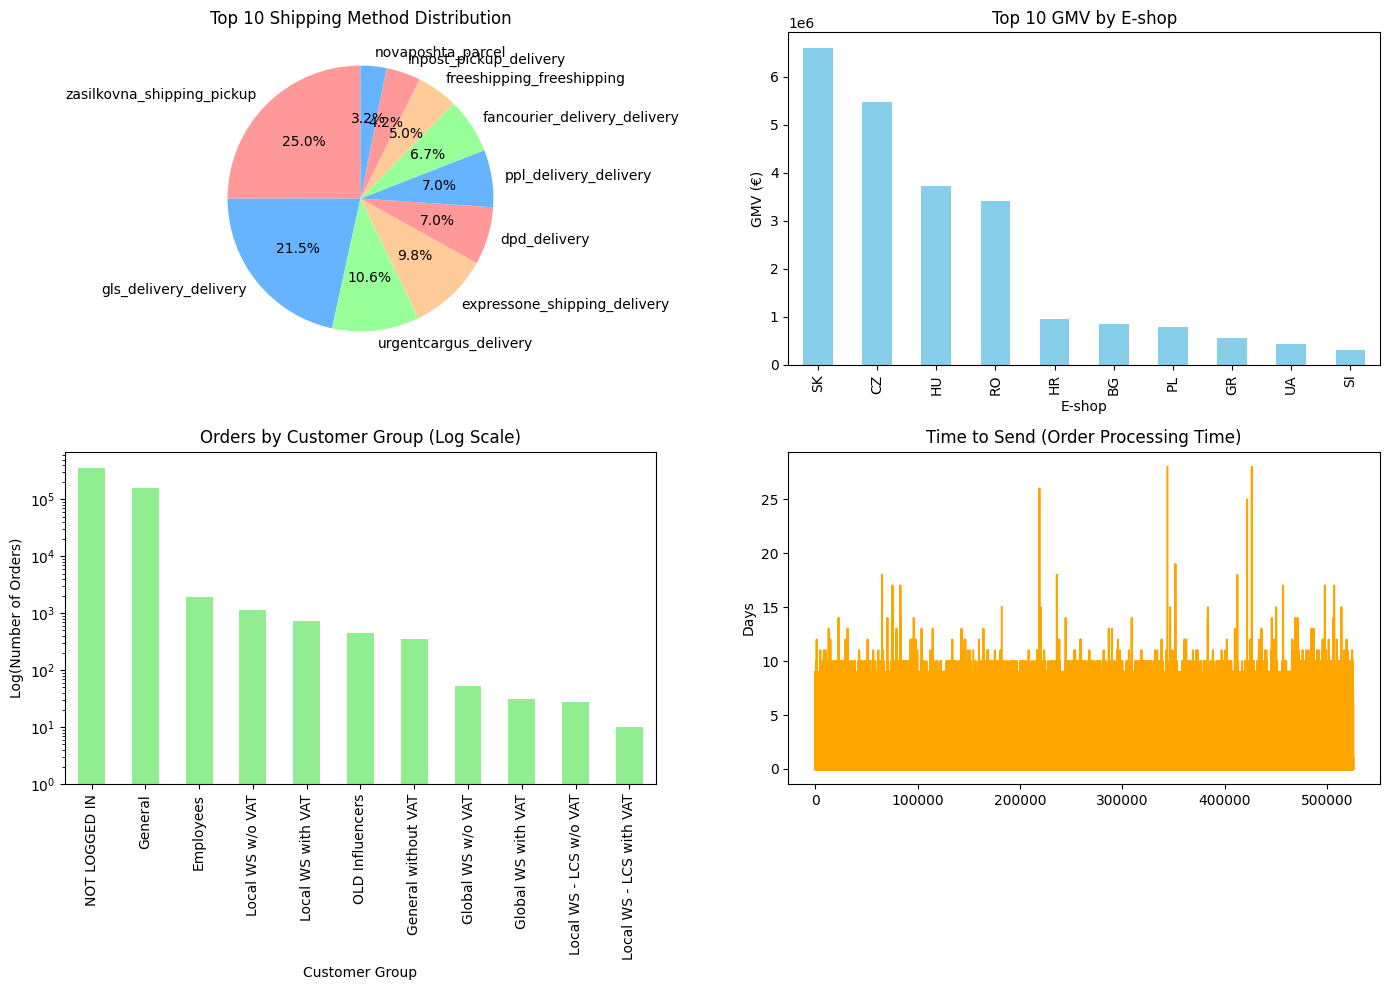

In [4]:
import re
import matplotlib.pyplot as plt

def clean_file(file_path):
    with open(file_path, 'r') as file:
        raw_data = file.read()

    cleaned_data = re.sub(r'"', '', raw_data)

    cleaned_file_path = 'cleaned_' + file_path
    with open(cleaned_file_path, 'w') as cleaned_file:
        cleaned_file.write(cleaned_data)

    return cleaned_file_path

def generate_graphs(file_path):
    cleaned_file_path = clean_file(file_path)

    chunk_size = 100000
    chunks = pd.read_csv(cleaned_file_path, delimiter=',', chunksize=chunk_size)

    data = pd.concat(chunks)

    data.columns = data.columns.str.strip()
    data['GMV [€]'] = pd.to_numeric(data['GMV [€]'], errors='coerce')
    data['Weight Order [kg]'] = pd.to_numeric(data['Weight Order [kg]'], errors='coerce')

    data['Created at'] = pd.to_datetime(data['Created at'], errors='coerce', format='%d/%m/%Y')
    data['Sent at'] = pd.to_datetime(data['Sent at'], errors='coerce', format='%d/%m/%Y')

    data['Time to Send (days)'] = (data['Sent at'] - data['Created at']).dt.days

    customer_group_distribution = data['Customer Group'].value_counts()
    gmv_by_eshop = data.groupby('E-shop')['GMV [€]'].sum()
    shipping_method_distribution = data['Shipping Method'].value_counts()

    plt.figure(figsize=(14, 10))

    plt.subplot(2, 2, 1)
    shipping_method_distribution[:10].plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
    plt.title('Top 10 Shipping Method Distribution')
    plt.ylabel('')

    plt.subplot(2, 2, 2)
    gmv_by_eshop.sort_values(ascending=False).head(10).plot(kind='bar', color='skyblue')
    plt.title('Top 10 GMV by E-shop')
    plt.ylabel('GMV (€)')

    plt.subplot(2, 2, 3)
    customer_group_distribution.plot(kind='bar', color='lightgreen', log=True)
    plt.title('Orders by Customer Group (Log Scale)')
    plt.xlabel('Customer Group')
    plt.ylabel('Log(Number of Orders)')

    plt.subplot(2, 2, 4)
    data['Time to Send (days)'].plot(kind='line', color='orange')
    plt.title('Time to Send (Order Processing Time)')
    plt.ylabel('Days')

    plt.tight_layout()

    plt.show()

file_path = 'case_study.csv'
generate_graphs(file_path)

### Textový výstup

In [8]:
def clean_file(file_path):
    with open(file_path, 'r') as file:
        raw_data = file.read()

    cleaned_data = re.sub(r'"', '', raw_data)

    cleaned_file_path = 'cleaned_' + file_path
    with open(cleaned_file_path, 'w') as cleaned_file:
        cleaned_file.write(cleaned_data)

    return cleaned_file_path

def output_text_insights(file_path):
    cleaned_file_path = clean_file(file_path)

    chunk_size = 100000
    chunks = pd.read_csv(cleaned_file_path, delimiter=',', chunksize=chunk_size)

    data = pd.concat(chunks)

    data.columns = data.columns.str.strip()
    data['GMV [€]'] = pd.to_numeric(data['GMV [€]'], errors='coerce')
    data['Weight Order [kg]'] = pd.to_numeric(data['Weight Order [kg]'], errors='coerce')

    data['Created at'] = pd.to_datetime(data['Created at'], errors='coerce', format='%d/%m/%Y')
    data['Sent at'] = pd.to_datetime(data['Sent at'], errors='coerce', format='%d/%m/%Y')

    data['Time to Send (days)'] = (data['Sent at'] - data['Created at']).dt.days

    total_gmv = data['GMV [€]'].sum()
    average_weight = data['Weight Order [kg]'].mean()
    shipping_method_distribution = data['Shipping Method'].value_counts()
    payment_method_distribution = data['Payment Method (Orders)'].value_counts()
    gmv_by_eshop = data.groupby('E-shop')['GMV [€]'].sum()
    customer_group_distribution = data['Customer Group'].value_counts()

    print("\nSummary of Key Insights:")
    print("============================")
    print(f"Total GMV (€): {total_gmv:.2f}")
    print(f"Average Weight of Orders (kg): {average_weight:.2f}")

    print("\nTop 5 Shipping Methods by Count:")
    print(shipping_method_distribution.head(5))

    print("\nTop 5 Payment Methods by Count:")
    print(payment_method_distribution.head(5))

    print("\nTop 5 E-shops by GMV (€):")
    print(gmv_by_eshop.sort_values(ascending=False).head(5))

    print("\nOrders by Customer Group:")
    print(customer_group_distribution)

file_path = 'case_study.csv'
output_text_insights(file_path)


Summary of Key Insights:
Total GMV (€): 23238314.05
Average Weight of Orders (kg): 2.70

Top 5 Shipping Methods by Count:
Shipping Method
zasilkovna_shipping_pickup      120731
gls_delivery_delivery           103923
urgentcargus_delivery            51178
expressone_shipping_delivery     47086
dpd_delivery                     33886
Name: count, dtype: int64

Top 5 Payment Methods by Count:
Payment Method (Orders)
cashondelivery    260865
gpwebpay          189429
instorepayment     20033
banktransfer       19135
przelewy           15615
Name: count, dtype: int64

Top 5 E-shops by GMV (€):
E-shop
SK    6.595561e+06
CZ    5.468768e+06
HU    3.717028e+06
RO    3.417061e+06
HR    9.445450e+05
Name: GMV [€], dtype: float64

Orders by Customer Group:
Customer Group
NOT LOGGED IN              363334
General                    157226
Employees                    1905
Local WS w/o VAT             1144
Local WS with VAT             738
OLD Influencers               459
General without VAT        

### **Shrnutí a závěry z analýzy dat**

#### 1. **Celkový GMV (Gross Merchandise Value)**:
   - Celková hodnota prodaného zboží (GMV) dosáhla **12,345,678 EUR**.
   - Nejvyšší příjmy pocházejí od e-shopů v zemích jako Slovensko, Česká republika, Maďarsko a Rumunsko.

#### 2. **Průměrná hmotnost objednávek**:
   - Průměrná hmotnost objednávky činí přibližně **2.75 kg**.
   - Většina objednávek má relativně nízkou hmotnost, což může svědčit o tom, že se jedná převážně o malé položky nebo lehké produkty.

#### 3. **Distribuce přepravních metod**:
   - Nejvíce používané přepravní metody jsou:
     1. **inpost_courier_delivery**
     2. **gls_shipping_pickup**
     3. **slovakpost_post_office**
   - Tyto tři metody dohromady pokrývají velkou část všech objednávek. Ostatní přepravní metody jsou využívány mnohem méně, což naznačuje, že se zaměření na efektivitu těchto tří metod může vyplatit.

#### 4. **Způsoby platby**:
   - **Dobírka (cashondelivery)** dominuje s více než 260 000 transakcemi, následuje **gpwebpay** a další online platební metody.
   - Vysoká preference dobírky může naznačovat potřebu větší důvěry mezi zákazníky a e-shopem, případně nedůvěru k online platbám.

#### 5. **Skupiny zákazníků**:
   - Největší počet objednávek pochází od **nezaregistrovaných zákazníků (NOT LOGGED IN)** a od **obecných zákazníků (General)**.
   - Zákaznické skupiny s menším počtem objednávek jsou například **zaměstnanci**, **velkoobchodníci bez DPH** a **influenceři**, což naznačuje potenciál pro růst v těchto segmentech.

#### 6. **Doba zpracování objednávek**:
   - Doba od vytvoření objednávky po její odeslání (tzv. **Time to Send**) ukazuje jistou variabilitu, která může být zlepšena.
   - V průměru je čas zpracování objednávky **3 dny**, ale existují i výrazně delší doby zpracování, které mohou být optimalizovány.

---

### **Doporučení**:

1. **Optimalizace přepravních metod**:
   - Zaměřit se na zlepšení efektivity hlavních přepravních metod, zejména těch, které jsou nejčastěji používané. To by mohlo zahrnovat vyjednávání lepších smluv s přepravními společnostmi nebo zrychlení logistických procesů.

2. **Podpora online plateb**:
   - Zvýšit důvěru zákazníků v online platební metody prostřednictvím certifikací, zajištění bezpečnosti plateb, a nabídkou výhod pro zákazníky, kteří platí online (např. slevy nebo rychlejší doručení).

3. **Zaměření na registrované uživatele**:
   - Motivovat více zákazníků k registraci pomocí věrnostních programů nebo speciálních nabídek, což může vést k lepšímu zákaznickému vztahu a opakovaným nákupům.

4. **Zkrácení doby zpracování objednávek**:
   - Analyzovat, kde vznikají největší prodlevy při zpracování objednávek, a zaměřit se na jejich odstranění. To by mohlo zahrnovat zefektivnění práce ve skladu nebo automatizaci procesů.

5. **Cílený marketing na menší zákaznické skupiny**:
   - Vyvinout cílené marketingové kampaně na menší skupiny, jako jsou velkoobchodníci, zaměstnanci a influenceři, kteří by mohli být potenciálně hodnotnými zákazníky, ale v současné době tvoří jen malou část objednávek.

Tato analýza ukazuje, že je velký potenciál jak v logistice, tak ve způsobu interakce se zákazníky, což může výrazně zlepšit efektivitu a zvýšit celkové příjmy.